<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Supervised_Learning_Classification_Naive_Bayesian_Multinomial_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
class Naive_Bayesian_Multinomial():
  def __init__(self,method='CountVectorizer'):
    self.method=method
    
  def data_transformation(self,train,test):
      if self.method =='CountVectorizer':
        vectorizer = CountVectorizer()
        print('model is : {}'.format(self.method))
      if self.method =='TFIDVectorizer':
        vectorizer = TfidfVectorizer()
        print('model is : {}'.format(self.method))
      if self.method != 'CountVectorizer' and self.method !='TFIDVectorizer':
        raise ValueError('Method must be "CountVectorizer" or "TFidVectorizer"')      
      X_train = vectorizer.fit_transform(train.data)
      X_test = vectorizer.transform(test.data)
      X_test = X_test.toarray()
      y_train = train.target
      y_test = test.target
      return X_train,X_test,y_train,y_test
  def likelihood(self,X_class, laplace=1):
    return ((X_class.sum(axis=0)) + laplace) / (np.sum(X_class.sum(axis=0) + laplace))
  
  def prior(self,X_class, m):
      return X_class.shape[0] / m
  
  def predict(self,X_test, priors, likelihoods):
    log_priors=np.log(priors)
    next=X_test @ np.log(likelihoods.T)
    pre=log_priors + next
    return pre
  

  def fit(self,X_train, y_train):
    
    m, n = X_train.shape
    classes = np.unique(y_train)  #list of class
    k = len(classes) #number of class
    
    priors = np.zeros(k) #prior for each classes
    likelihoods = np.zeros((k, n)) #likehood for each class of each feature
    
    for idx, label in enumerate(classes):
        X_train_c = X_train[y_train==label]
        priors[idx] = self.prior(X_train_c, m)
        likelihoods[idx, :] = self.likelihood(X_train_c)
    return priors, likelihoods
  def report(self,y_test,yhat):
    n_classes = len(np.unique(y_test))
    print('model is : {}'.format(self.method))
    print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))
    print("=========Average precision score=======")
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
    yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])
    for i in range(n_classes):
       class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
       print(f"Class {i} score: ", class_score)
    print("=========Classification report=======")
    print("Report: ", classification_report(y_test, yhat))

  def chart(self,y_test,yhat):
    mat = confusion_matrix(y_test, yhat)
    sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
    plt.xlabel('true')
    plt.ylabel('predicted')
    



In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [4]:
model=Naive_Bayesian_Multinomial(method='TFIDVectorizer')
X_train,X_test,y_train,y_test=model.data_transformation(train,test)
priors, likelihoods = model.fit(X_train,y_train)

model is : TFIDVectorizer


model is : TFIDVectorizer
Accuracy:  0.8016759776536313
=========Average precision score=======
Class 0 score:  0.888341920518241
Class 1 score:  0.8744630809734135
Class 2 score:  0.6122064043881043
Class 3 score:  0.332994836297269
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



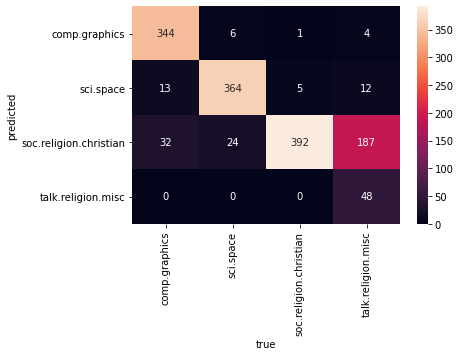

In [6]:
yhat = model.predict(X_test, priors, likelihoods)
yhat = np.argmax(yhat, axis=1)
model.report(y_test,yhat)
model.chart(y_test,yhat)

In [9]:
model=Naive_Bayesian_Multinomial(method='CountVectorizer')
X_train,X_test,y_train,y_test=model.data_transformation(train,test)
priors, likelihoods = model.fit(X_train,y_train)

model is : CountVectorizer


model is : CountVectorizer
Accuracy:  0.9168994413407822
=========Average precision score=======
Class 0 score:  0.9152047938418233
Class 1 score:  0.9069918620723723
Class 2 score:  0.8429395016564877
Class 3 score:  0.7277310085946386
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432



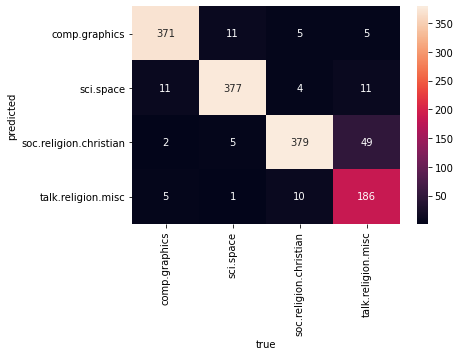

In [10]:
yhat = model.predict(X_test, priors, likelihoods)
yhat = np.argmax(yhat, axis=1)
model.report(y_test,yhat)
model.chart(y_test,yhat)